<a href="https://colab.research.google.com/github/neh-21/loan-aproval/blob/main/Copy_of_orginal_of_loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###INTRO
The Loan Approval Prediction project aims to build machine learning models that can accurately predict whether a loan application should be approved or not, based on various applicant features such as income, credit history, employment status,loan amount  and property status. Automating the loan approval process using data-driven techniques can help financial institutions make faster and more consistent decisions, reduce manual errors, and improve overall customer experience.

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/loan_approval.csv") #load csv dataset into pandas dataframe
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


preprocessing

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1


In [ ]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1
44999,24,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3,628,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   44999 non-null  object 
 2   person_education                44997 non-null  object 
 3   person_income                   44999 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           44998 non-null  object 
 6   loan_amnt                       44998 non-null  float64
 7   loan_intent                     44999 non-null  object 
 8   loan_int_rate                   44999 non-null  float64
 9   loan_percent_income             44997 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.499900e+04,45000.000000,4.499800e+04,44999.000000,44997.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031762e+04,5.410333,9.635541e+03,11.012625,0.139729,5.867489,632.608756,0.222222
std,6.045108,8.042282e+04,6.063532,1.332906e+04,3.182025,0.087213,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,-3.000000e+03,-40.000000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720200e+04,1.000000,5.000000e+03,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8.000000e+03,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578600e+04,8.000000,1.223050e+04,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,2.500000e+06,200.000000,0.660000,30.000000,850.000000,1.000000


checking null

In [ ]:
df.isna()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
person_age,0
person_gender,1
person_education,3
person_income,1
person_emp_exp,0
person_home_ownership,2
loan_amnt,2
loan_intent,1
loan_int_rate,1
loan_percent_income,3


In [ ]:
df.dropna(inplace=True) #drop null values
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [ ]:
df.duplicated().sum()

np.int64(0)

Boxploting for checking outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x78d39d101450>,
 'caps': [<matplotlib.lines.Line2D at 0x78d39d102bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78d39d0b6bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x78d39d114050>],
 'fliers': [<matplotlib.lines.Line2D at 0x78d39d114a10>],
 'means': []}

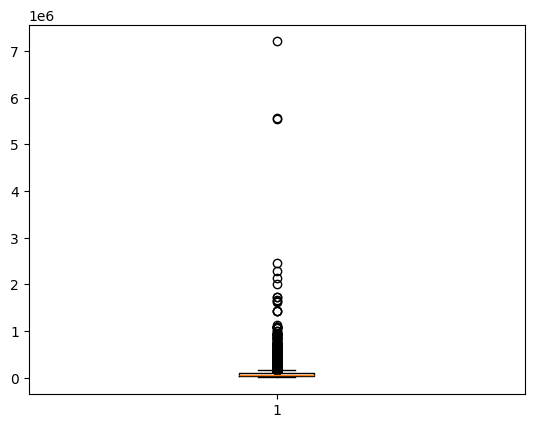

In [ ]:
plt.boxplot(df['person_income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78d39afb1250>,
 'caps': [<matplotlib.lines.Line2D at 0x78d39afb3610>,
 'boxes': [<matplotlib.lines.Line2D at 0x78d39d0c70d0>],
 'medians': [<matplotlib.lines.Line2D at 0x78d39afbcf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x78d39afbdad0>],
 'means': []}

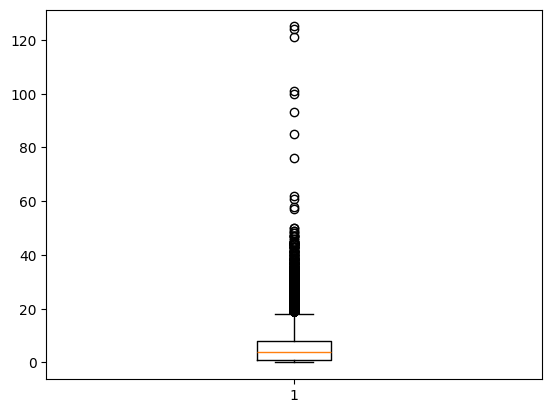

In [ ]:
plt.boxplot(df['person_emp_exp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78d39b019210>,
 'caps': [<matplotlib.lines.Line2D at 0x78d39b01a990>,
 'boxes': [<matplotlib.lines.Line2D at 0x78d39b018790>],
 'medians': [<matplotlib.lines.Line2D at 0x78d39b0280d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78d39b028bd0>],
 'means': []}

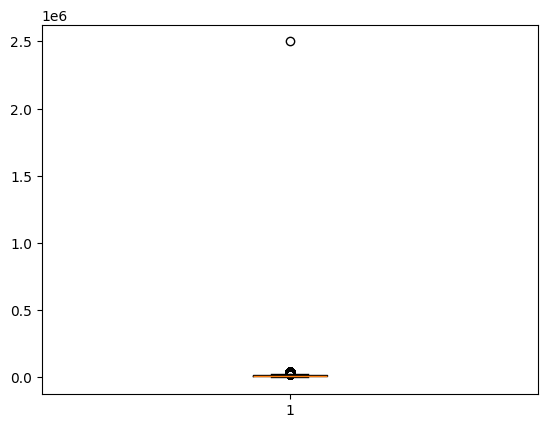

In [ ]:
plt.boxplot(df['loan_amnt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78d39b07a350>,
 'caps': [<matplotlib.lines.Line2D at 0x78d39b07bb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x78d39b03f210>],
 'medians': [<matplotlib.lines.Line2D at 0x78d39b08d410>],
 'fliers': [<matplotlib.lines.Line2D at 0x78d39b08df50>],
 'means': []}

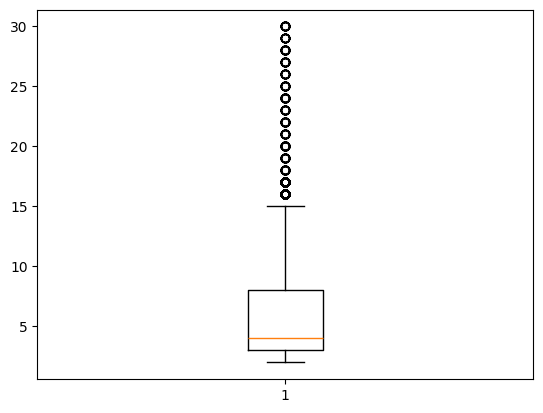

In [ ]:
plt.boxplot(df['cb_person_cred_hist_length'])

Handling outliers

In [ ]:
df['person_income'] = pd.to_numeric(df['person_income'])
Q1=df['person_income'].quantile(0.25)
Q3=df['person_income'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['person_income']<(lowerbound))|(
        df['person_income']>(upperbound)))]

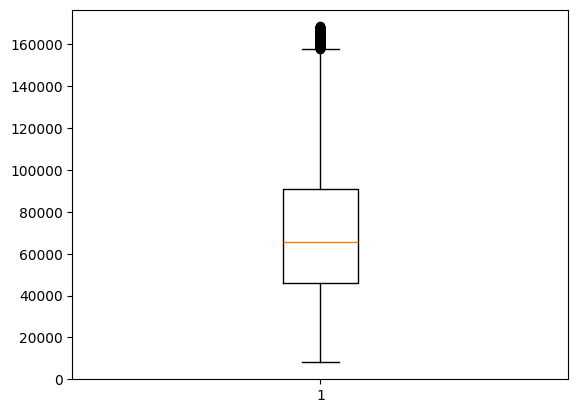

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['person_income'])
plt.show()

In [ ]:
df['person_emp_exp'] = pd.to_numeric(df['person_emp_exp'])
Q1=df['person_emp_exp'].quantile(0.25)
Q3=df['person_emp_exp'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['person_emp_exp']<(lowerbound))|(
        df['person_emp_exp']>(upperbound)))]

/tmp/ipython-input-21-8298735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_emp_exp'] = pd.to_numeric(df['person_emp_exp'])


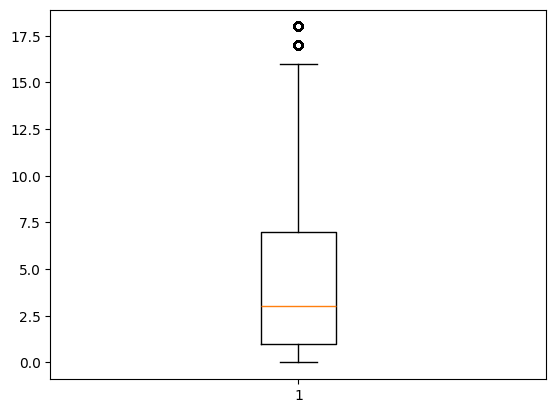

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['person_emp_exp'])
plt.show()

In [ ]:
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'])
Q1=df['loan_amnt'].quantile(0.25)
Q3=df['loan_amnt'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['loan_amnt']<(lowerbound))|(
        df['loan_amnt']>(upperbound)))]

/tmp/ipython-input-23-2223363694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_amnt'] = pd.to_numeric(df['loan_amnt'])


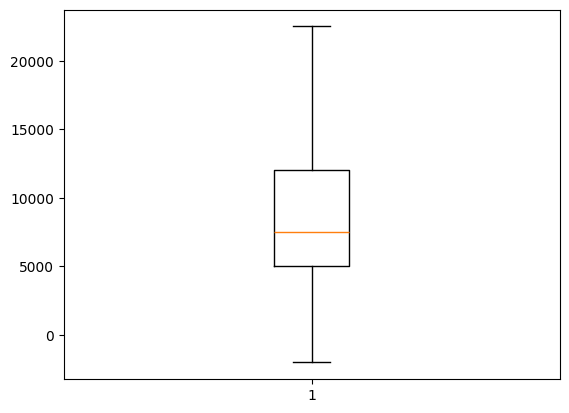

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['loan_amnt'])
plt.show()

In [ ]:
df['cb_person_cred_hist_length'] = pd.to_numeric(df['cb_person_cred_hist_length'])
Q1=df['cb_person_cred_hist_length'].quantile(0.25)
Q3=df['cb_person_cred_hist_length'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['cb_person_cred_hist_length']<(lowerbound))|(
        df['cb_person_cred_hist_length']>(upperbound)))]

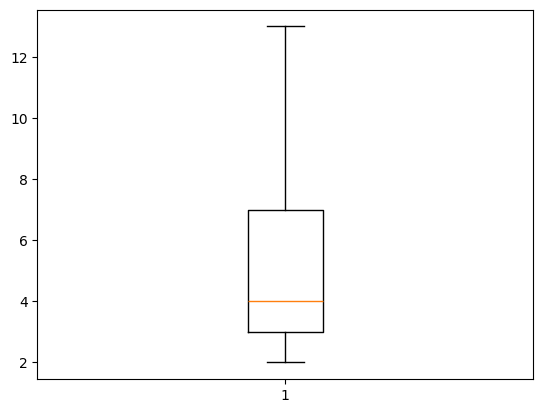

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['cb_person_cred_hist_length'])
plt.show()

label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_gender'] = le.fit_transform(df['person_gender'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
5,21,0,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2,532,No,1
9,21,0,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3,640,No,1
11,21,0,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2,651,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,1,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,1,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_education'] = le.fit_transform(df['person_education'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,0,3,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
5,21,0,3,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2,532,No,1
9,21,0,3,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3,640,No,1
11,21,0,0,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2,651,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,0,0,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,1,0,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,1,1,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,0,3,12438.0,3,0,5500.0,MEDICAL,12.87,0.44,3,635,No,1
5,21,0,3,12951.0,0,2,2500.0,VENTURE,7.14,0.19,2,532,No,1
9,21,0,3,12739.0,0,2,1600.0,VENTURE,14.74,0.13,3,640,No,1
11,21,0,0,13113.0,0,2,4500.0,HOMEIMPROVEMENT,8.63,0.34,2,651,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971.0,6,3,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,0,0,65800.0,17,3,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,1,0,56942.0,7,3,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,1,1,33164.0,4,3,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504,Yes,0
2,25,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3,635,No,1
5,21,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2,532,No,1
9,21,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3,640,No,1
11,21,0,0,13113.0,0,2,4500.0,2,8.63,0.34,2,651,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3,645,No,1
44996,37,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11,621,No,1
44997,33,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10,668,No,1
44998,29,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6,604,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504,1,0
2,25,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3,635,0,1
5,21,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2,532,0,1
9,21,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3,640,0,1
11,21,0,0,13113.0,0,2,4500.0,2,8.63,0.34,2,651,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3,645,0,1
44996,37,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11,621,0,1
44997,33,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10,668,0,1
44998,29,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6,604,0,1


In [ ]:
df.corr() #correlation of columns

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,-0.005157,-0.026802,0.097322,0.901567,-0.035484,0.036729,0.025586,0.005718,-0.033033,0.803268,0.129448,-0.005986,-0.027852
person_gender,-0.005157,1.000000,-0.001233,0.012173,-0.010201,0.000037,0.004527,-0.004725,0.001687,-0.001262,-0.008180,-0.003539,0.003680,0.000445
person_education,-0.026802,-0.001233,1.000000,0.004983,-0.023316,-0.002410,-0.004117,0.004702,0.003656,-0.009941,-0.022546,0.015610,-0.005343,-0.000743
person_income,0.097322,0.012173,0.004983,1.000000,0.079370,-0.356847,0.325436,-0.006876,-0.063882,-0.391280,0.060990,0.015010,0.151223,-0.285017
person_emp_exp,0.901567,-0.010201,-0.023316,0.079370,1.000000,-0.032120,0.030319,0.024128,0.010739,-0.027419,0.731833,0.140124,-0.011357,-0.025114
person_home_ownership,-0.035484,0.000037,-0.002410,-0.356847,-0.032120,1.000000,-0.108842,0.000493,0.152086,0.155540,-0.024157,-0.002057,-0.125492,0.228199
loan_amnt,0.036729,0.004527,-0.004117,0.325436,0.030319,-0.108842,1.000000,0.002270,0.090126,0.642452,0.026428,0.005073,-0.044688,0.088031
loan_intent,0.025586,-0.004725,0.004702,-0.006876,0.024128,0.000493,0.002270,1.000000,-0.003822,0.009109,0.023890,0.015604,0.034799,-0.065322
loan_int_rate,0.005718,0.001687,0.003656,-0.063882,0.010739,0.152086,0.090126,-0.003822,1.000000,0.105735,0.013179,0.010742,-0.178577,0.324625
loan_percent_income,-0.033033,-0.001262,-0.009941,-0.391280,-0.027419,0.155540,0.642452,0.009109,0.105735,1.000000,-0.014468,-0.005879,-0.202344,0.376722


In [ ]:
corr_matrix = df.corr(numeric_only=True)  #compute corelation only for numeric colowmns

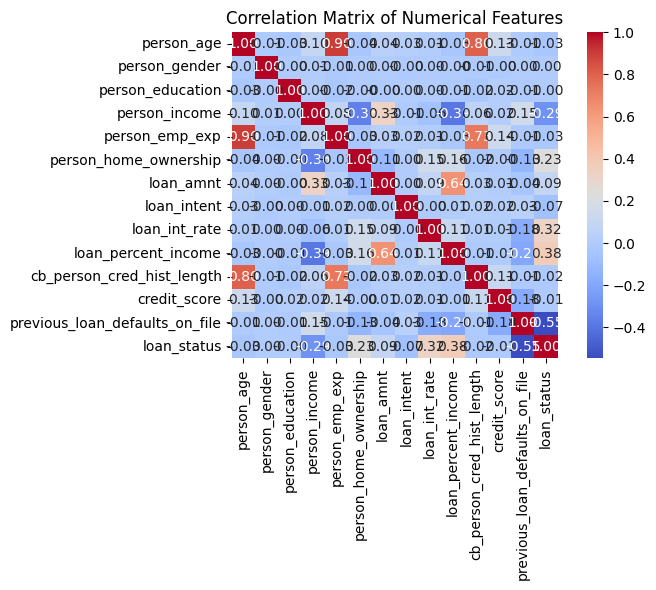

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)  #plot matrix with color coding
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_exp'}>,
        <Axes: title={'center': 'loan_amnt'}>],
       [<Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'credit_score'}>]], dtype=object)

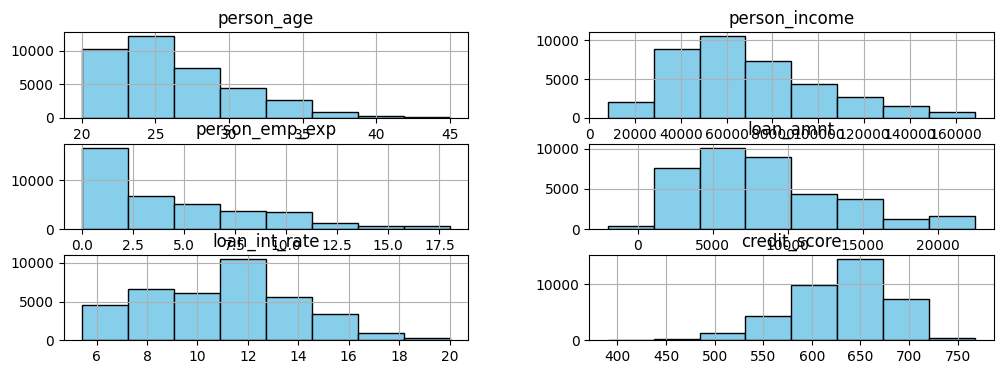

In [ ]:
df[['person_age', 'person_income', 'person_emp_exp','loan_amnt','loan_int_rate','credit_score']].hist(bins=8, figsize=(12, 4), color='skyblue', edgecolor='black')
#plots histogram for several colwmns,showing the distribuition of each

In [ ]:
from sklearn.preprocessing import MinMaxScaler   #min max normalization
#scale features
def normalize_column(df, person_income):
    scaler = MinMaxScaler()
    df[person_income] = scaler.fit_transform(df[[person_income]])
    return df

In [ ]:
df = normalize_column(df, 'person_income')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,0.026672,0,2,1000.0,1,11.14,0.08,2,504,1,0
2,25,0,3,0.027644,3,0,5500.0,3,12.87,0.44,3,635,0,1
5,21,0,3,0.030839,0,2,2500.0,5,7.14,0.19,2,532,0,1
9,21,0,3,0.029519,0,2,1600.0,5,14.74,0.13,3,640,0,1
11,21,0,0,0.031849,0,2,4500.0,2,8.63,0.34,2,651,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,0.248977,6,3,15000.0,3,15.66,0.31,3,645,0,1
44996,37,0,0,0.360033,17,3,9000.0,2,14.07,0.14,11,621,0,1
44997,33,1,0,0.304857,7,3,2771.0,0,10.02,0.05,10,668,0,1
44998,29,1,1,0.156745,4,3,12000.0,1,13.23,0.36,6,604,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Standardization:stdandardize feature
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
print("\nStandard Scaled Data :\n", df_standard_scaled.head())


Standard Scaled Data :
    person_age  person_gender  person_education  person_income  person_emp_exp  \
0   -1.358843      -1.100953          0.849520      -1.794314       -1.029327   
1   -0.373653      -1.100953          0.849520      -1.789387       -0.290597   
2   -1.358843      -1.100953          0.849520      -1.773187       -1.029327   
3   -1.358843      -1.100953          0.849520      -1.779882       -1.029327   
4   -1.358843      -1.100953         -1.179338      -1.768072       -1.029327   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0               0.159117  -1.527804    -0.879383       0.076834   
1              -1.241344  -0.609900     0.278265       0.663388   
2               0.159117  -1.221836     1.435913      -1.279359   
3               0.159117  -1.405417     1.435913       1.297408   
4               0.159117  -0.813879    -0.300559      -0.774177   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0            -0.6

Train split

In [ ]:
from sklearn.model_selection import train_test_split
X= df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(df.shape)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38141, 14)
(38141, 13)
(38141,)
(30512, 13)
(30512,)
(7629, 13)
(7629,)


#logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_test  #containing the true labels for the test set

,loan_status
16646,1
11391,0
5422,0
22954,0
20545,0
...,...
23487,0
41284,0
23470,0
18388,0


In [ ]:
y_pred = lr.predict(X_test)    #predict the loan status
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score   #Accuracy score
print(accuracy_score(y_test, y_pred))

0.845195962773627


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report  #shows matrix comparing pred vs actual
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5383  580]
 [ 601 1065]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5963
           1       0.65      0.64      0.64      1666

    accuracy                           0.85      7629
   macro avg       0.77      0.77      0.77      7629
weighted avg       0.84      0.85      0.84      7629



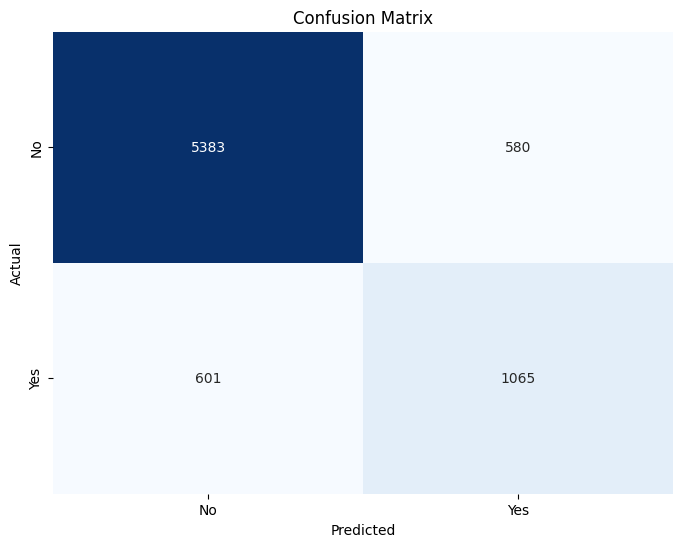

In [ ]:
#plot graph showing confusion matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7636649626425481
[[5541  422]
 [1381  285]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      5963
           1       0.40      0.17      0.24      1666

    accuracy                           0.76      7629
   macro avg       0.60      0.55      0.55      7629
weighted avg       0.71      0.76      0.72      7629



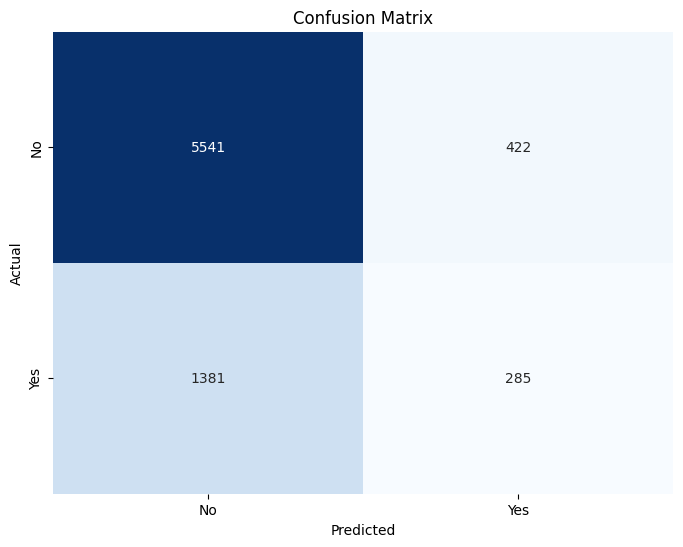

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Hyperparameter tunning KNN K=7

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)           #value of k(hyperparameter n_neighbors)=7
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7708742954515664
[[5656  307]
 [1441  225]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      5963
           1       0.42      0.14      0.20      1666

    accuracy                           0.77      7629
   macro avg       0.61      0.54      0.54      7629
weighted avg       0.72      0.77      0.72      7629



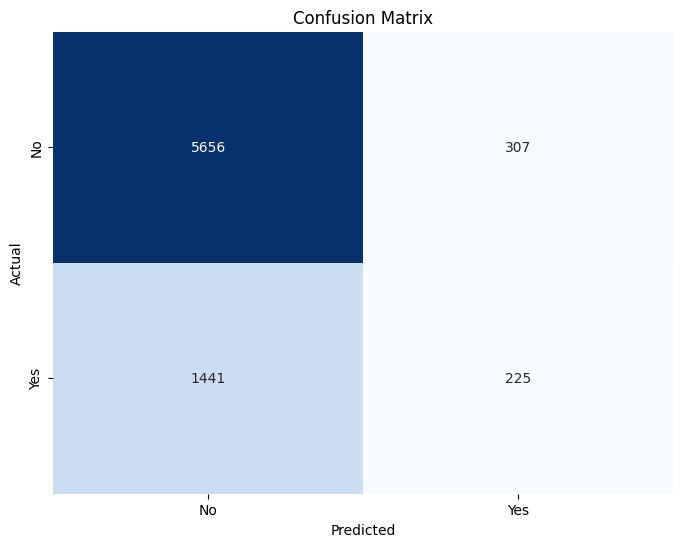

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#random forest:  categorical outcomes are predicted

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9221392056626032
[[5777  186]
 [ 408 1258]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5963
           1       0.87      0.76      0.81      1666

    accuracy                           0.92      7629
   macro avg       0.90      0.86      0.88      7629
weighted avg       0.92      0.92      0.92      7629



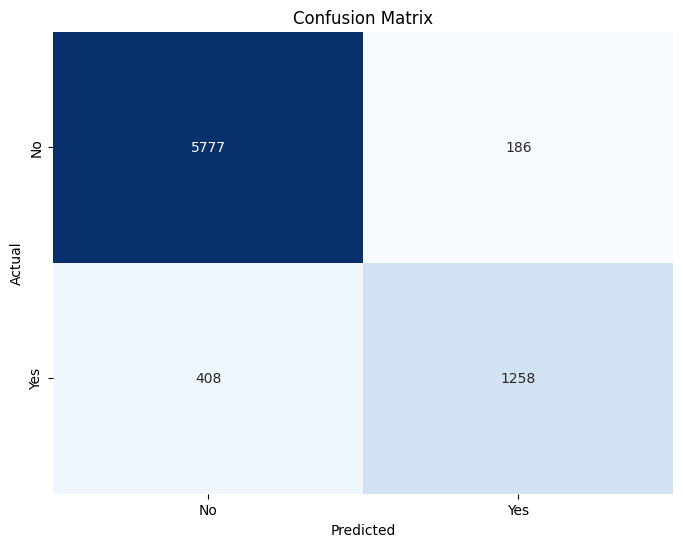

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##hyperparameter tunning RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150)          # value of n_estimators=150
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9238432297810985
[[5776  187]
 [ 394 1272]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5963
           1       0.87      0.76      0.81      1666

    accuracy                           0.92      7629
   macro avg       0.90      0.87      0.88      7629
weighted avg       0.92      0.92      0.92      7629



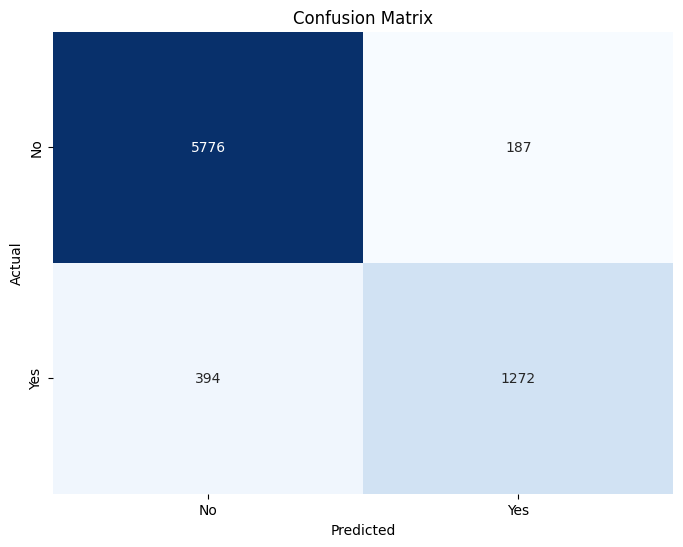

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')                 # kernel=linear
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8661685673089526
[[5519  444]
 [ 577 1089]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5963
           1       0.71      0.65      0.68      1666

    accuracy                           0.87      7629
   macro avg       0.81      0.79      0.80      7629
weighted avg       0.86      0.87      0.86      7629



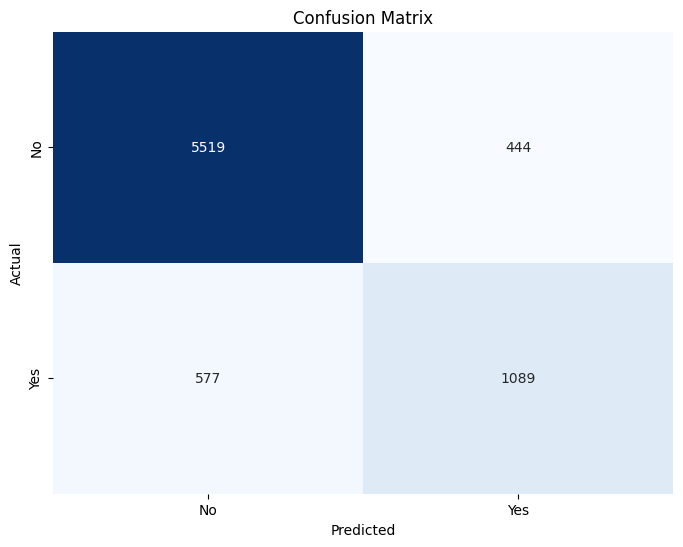

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Hyperparameter tunning SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')                 # kernel=rbf
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7816227552759208
[[5963    0]
 [1666    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5963
           1       0.00      0.00      0.00      1666

    accuracy                           0.78      7629
   macro avg       0.39      0.50      0.44      7629
weighted avg       0.61      0.78      0.69      7629



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


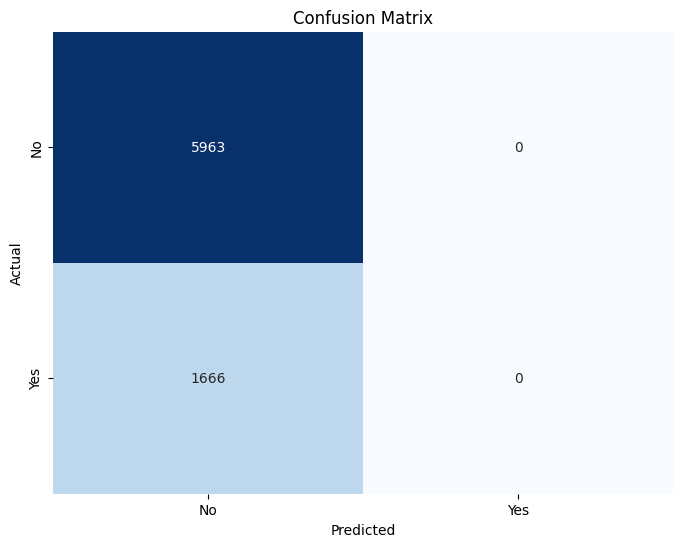

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#GNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8385109450779918
[[4928 1035]
 [ 197 1469]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5963
           1       0.59      0.88      0.70      1666

    accuracy                           0.84      7629
   macro avg       0.77      0.85      0.80      7629
weighted avg       0.88      0.84      0.85      7629



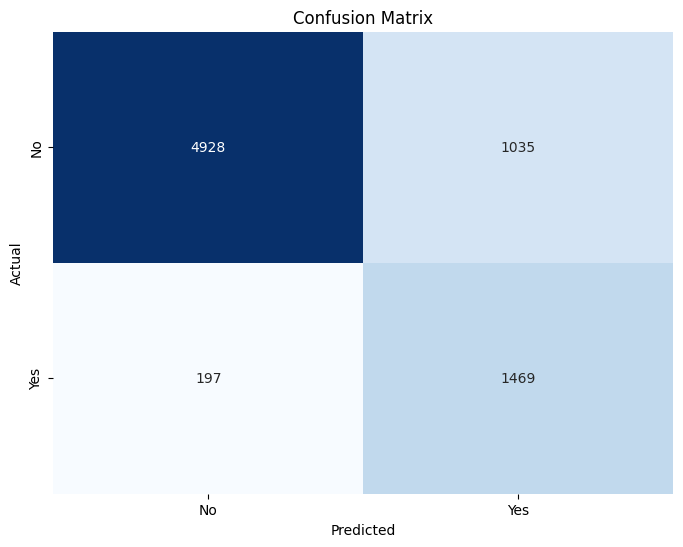

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier  #predicting categorical outcomes
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8968410014418665
[[5550  413]
 [ 374 1292]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5963
           1       0.76      0.78      0.77      1666

    accuracy                           0.90      7629
   macro avg       0.85      0.85      0.85      7629
weighted avg       0.90      0.90      0.90      7629



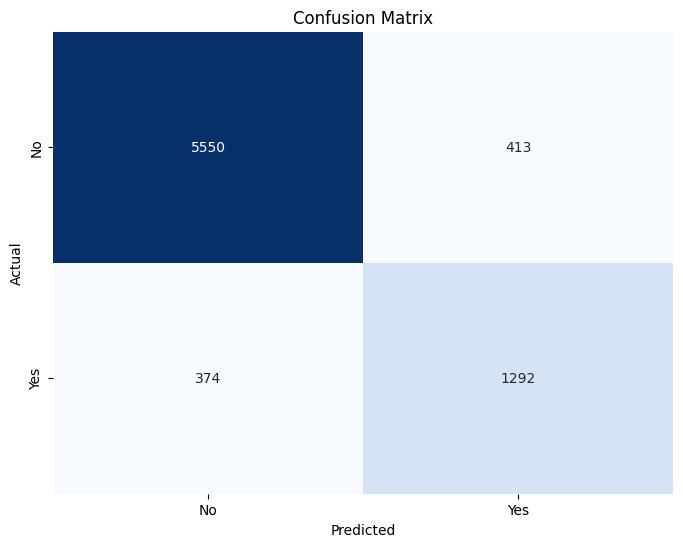

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#MLP classifiers

In [ ]:
from sklearn.neural_network import MLPClassifier
#Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,5), max_iter=1000, random_state=42)
# Train the MLP model
mlp.fit(X_train, y_train)
# Make prediction
y_pred = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8259273823567964
[[5865   98]
 [1230  436]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5963
           1       0.82      0.26      0.40      1666

    accuracy                           0.83      7629
   macro avg       0.82      0.62      0.65      7629
weighted avg       0.82      0.83      0.79      7629



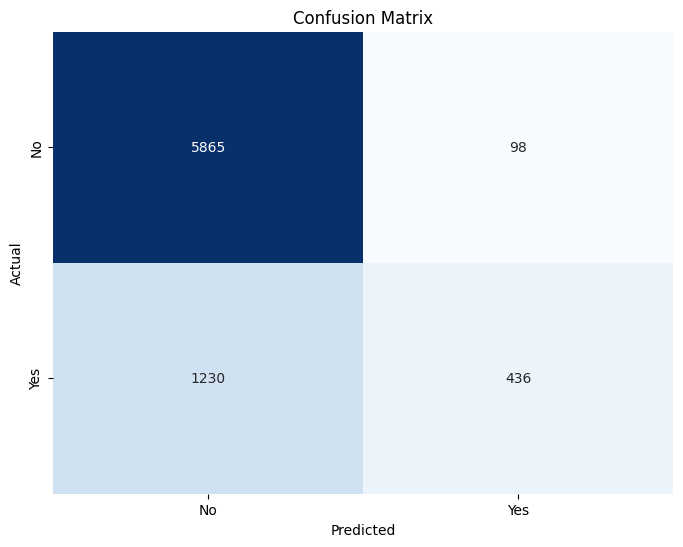

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#gradient boosting  classifier   

In [ ]:
import pandas as pd
import sklearn.metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.datasets import load_digits

In [ ]:
# Instantiate the classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=300,      # Number of trees
    learning_rate=0.05,    # Contribution of each tree
    max_features=5,        # Number of features considered for splits
    random_state=42
)

# Train the model
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=42)

In [ ]:
# Predict on test data
y_pred = gb_classifier.predict(X_test)

In [ ]:
# Classification report and accuracy
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5963
           1       0.86      0.76      0.80      1666

    accuracy                           0.92      7629
   macro avg       0.90      0.86      0.88      7629
weighted avg       0.92      0.92      0.92      7629

[[5752  211]
 [ 405 1261]]
Accuracy: 0.919255472538996


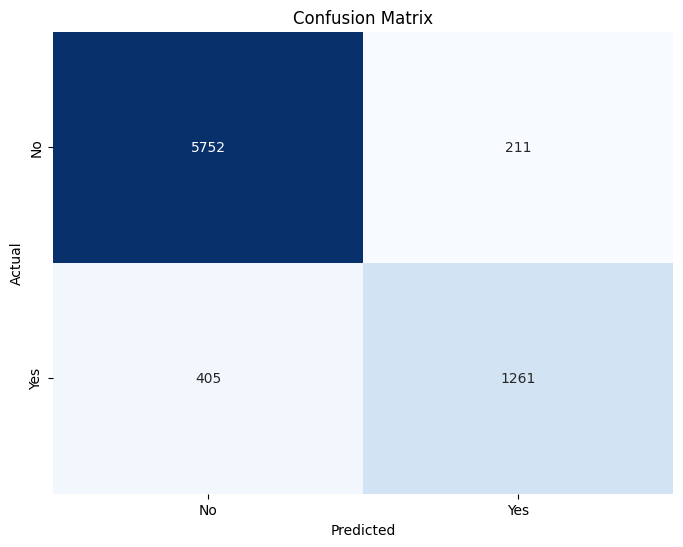

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#XGB classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#split into training and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"training samples:{X_train.shape[0]},testing samples:{X_test.shape[0]}")  #sample size

training samples:30512,testing samples:7629


In [ ]:
#create an XGBoost classifier instance
model=XGBClassifier(
    n_estimators=100,      #no of boosting rounds
    learning_rate=0.1,      #max tree depth
    max_depth=3,            #stepsize shrinkagr
    objective='binary:logistic',   #binary classification
    random_state=42
)

In [ ]:
#train the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

[[5766  197]
 [ 424 1242]]
Accuracy: 0.918600078647267
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5963
           1       0.86      0.75      0.80      1666

    accuracy                           0.92      7629
   macro avg       0.90      0.86      0.87      7629
weighted avg       0.92      0.92      0.92      7629



In [ ]:
#hyperparameter tuning using GridSearchCV with RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9260947313658949


#Compare the classifiers
| Model                | Hyperparameter(s)    | Accuracy (%) | Precision | Recall | F1-Score |
|----------------------|---------------------|--------------|-----------|--------|----------|
| Logistic Regression   | —                   | 85%        | 0.84      | 0.85   | 0.84     |
| kNN                  | k=5                 | 76%         | 0.71      | 0.76   | 0.72     |
| KNN                  | k=7                 | 77%        | 0.72      | 0.77  | 0.72    |
| random forest| n=50|92%|0.92|0.92|0.92|
|random forest|n=150|92%|0.92|0.92|0.92
| SVM                  | kernel='linear'     | 87%         | 0.86      | 0.87   | 0.86     |
| SVM                  | kernel='rbf'        | 78%        | 0.61      | 0.78 | 0.69    |
| Gaussian naive bayes                  |        | 84%         | 0.88      | 0.84   | 0.85     |
| Decision tree c                  |         | 90%         | 0.90      | 0.90   | 0.90     |
| MLP                  |     | 83%         | 0.82      | 0.83   | 0.79     |
| GBC                  |        | 92%         | 0.92    | 0.92  | 0.92     |
|XGB|   | 92%|0.92|0.92|0.92|



#Conclusion
**Random Forest (n=50 & n=150), Gradient Boosting (GBC), and XGBoost (XGB)**  consistently achieved the highest accuracy of 92% along with excellent precision, recall, and F1-scores (0.92), indicating balanced and robust performance.

**Decision Tree Classifier** also performed strongly with 90% accuracy, showing that even a single-tree model can be competitive.

**Logistic Regression and SVM (linear kernel)** delivered decent performance (85–87% accuracy), suitable for simpler or linearly separable problems.

**k-Nearest Neighbors (k=5 and k=7) and SVM (rbf kernel)** underperformed, suggesting these models may not generalize well on this dataset or require further tuning.

**Gaussian Naive Bayes and MLP** showed moderate performance, but were outperformed by ensemble models.                                                                          


Random Forest, Gradient Boosting, and XGBoost are recommended due to their high accuracy, strong generalization, and balanced metrics. These models are well-suited for production deployment or further optimization.